<a href="https://colab.research.google.com/github/Sarath-Haridas/Capstone_Project_2_Bike_sharing_demand_prediction/blob/main/Bike_sharing_demand_prediction__Capstone_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Mount the drive and Import the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Supervised ML-Regression_Capstone_Project/SeoulBikeData.csv', encoding = 'unicode_escape' )

#Let's Explore and Understand about the data

In [5]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


#**Preprocessing the Dataset**

**Missing values**
* **The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.**

In [8]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **As we can see above there are no missing values present in the data**

In [9]:
df.min()

Date                         01/01/2018
Rented Bike Count                     0
Hour                                  0
Temperature(°C)                   -17.8
Humidity(%)                           0
Wind speed (m/s)                    0.0
Visibility (10m)                     27
Dew point temperature(°C)         -30.6
Solar Radiation (MJ/m2)             0.0
Rainfall(mm)                        0.0
Snowfall (cm)                       0.0
Seasons                          Autumn
Holiday                         Holiday
Functioning Day                      No
dtype: object

**Duplicate Value** 
* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.**

In [10]:
len(df[df.duplicated()])

0

* **As we can see above there are no Duplicates values present in the data**

#**Renaming some Columns name (For Modelling purpose)**
* **Since the variables having units with name, so renaming columns for better variable analysis**

In [12]:
#Renaming some columns name
df = df.rename(columns = {'Rented Bike Count' : 'Rented_Bike_Count',
                                    'Temperature(°C)':'Temperature',
                                    'Humidity(%)':'Humidity',
                                    'Wind speed (m/s)': 'Wind_speed',
                                    'Visibility (10m)':'Visibility',
                                    'Dew point temperature(°C)': 'Dew_point_temperature', 
                                    'Solar Radiation (MJ/m2)': 'Solar_Radiation',
                                    'Rainfall(mm)':'Rainfall',
                                    'Snowfall (cm)':'Snowfall', 
                                    'Functioning Day':'Functioning_Day'})

In [13]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))

In [14]:
df['day'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017


In [ ]:
df['Weekend_or_weekday'] = df['day'].apply(lambda x: 1 if x == "Saturday" or x == "Sunday" else 0)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year,Weekend_or_weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0


In [ ]:
df['Weekend_or_weekday'].value_counts()

0    6264
1    2496
Name: Weekend_or_weekday, dtype: int64

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year,Weekend_or_weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,2017,0


In [ ]:
columns = ['Hour','month', 'Weekend_or_weekday']
for i in columns:
  df[columns] = df[columns].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   category      
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df.drop(columns= ['year', 'Date'], inplace = True)

##EDA

Text(0.5, 1.0, 'Month vs Bike count')

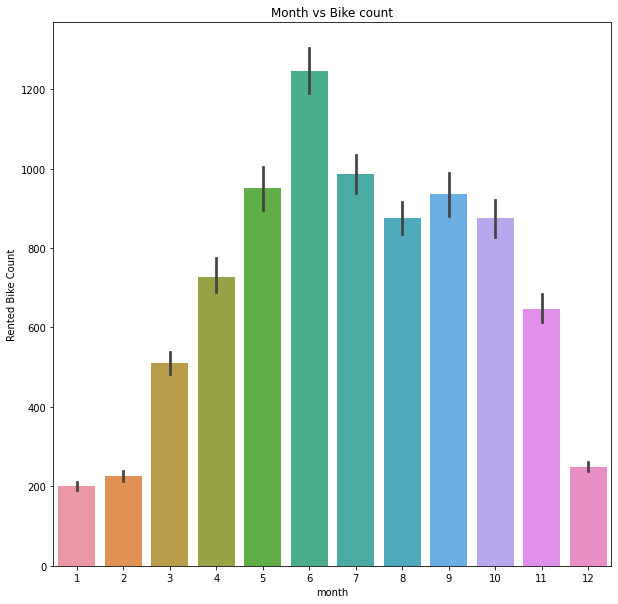

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='month',y='Rented Bike Count')
plt.title("Month vs Bike count")

Text(0.5, 1.0, 'Days vs Bike count')

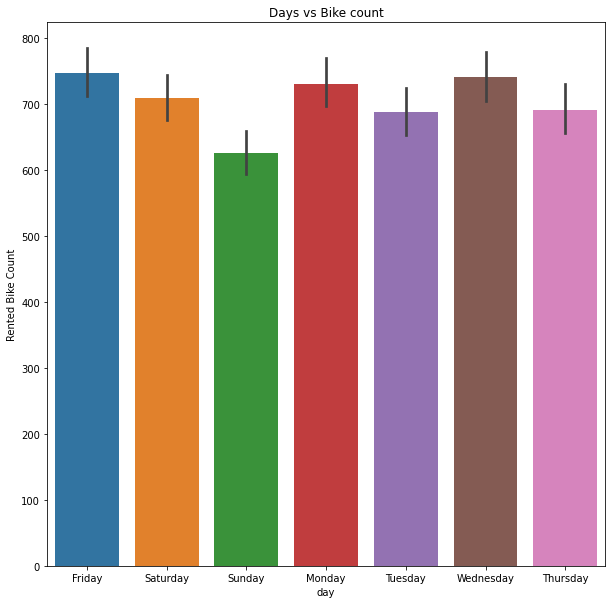

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='day',y='Rented Bike Count')
plt.title("Days vs Bike count")

Text(0.5, 1.0, 'Weekends/Weekdays vs Bike count')

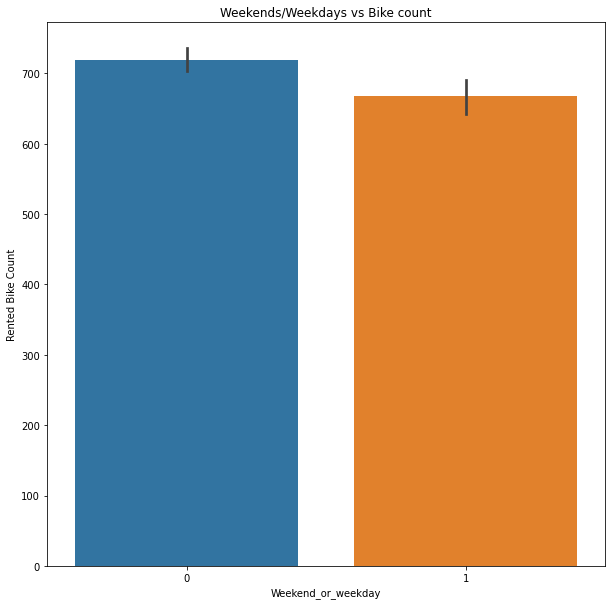

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='Weekend_or_weekday',y='Rented Bike Count')
plt.title("Weekends/Weekdays vs Bike count")

Text(0.5, 1.0, 'Weekends/Weekdays vs Bike count')

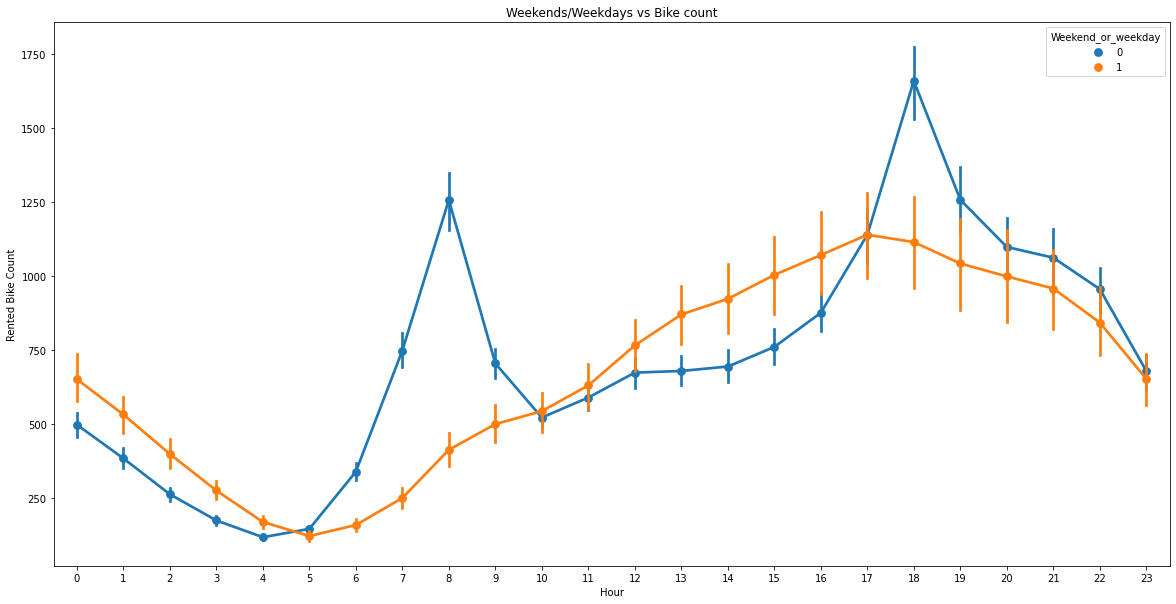

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count', hue = 'Weekend_or_weekday')
plt.title("Weekends/Weekdays vs Bike count")

Text(0.5, 1.0, 'Functioning day vs Bike count')

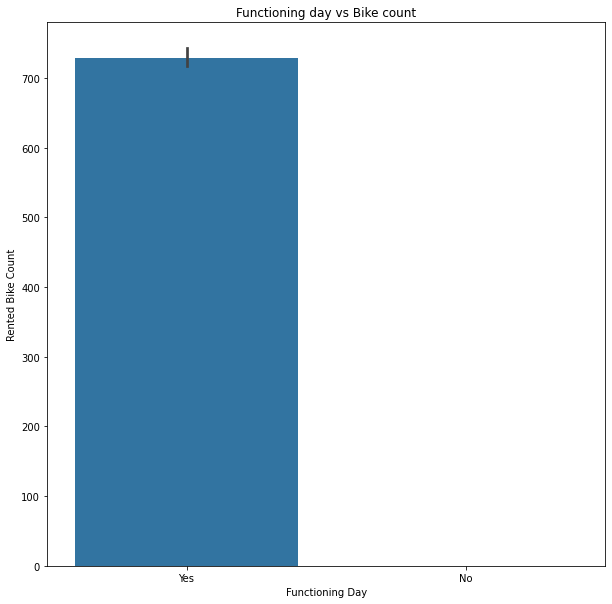

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count')
plt.title("Functioning day vs Bike count")

Text(0.5, 1.0, 'Hours vs Bike count')

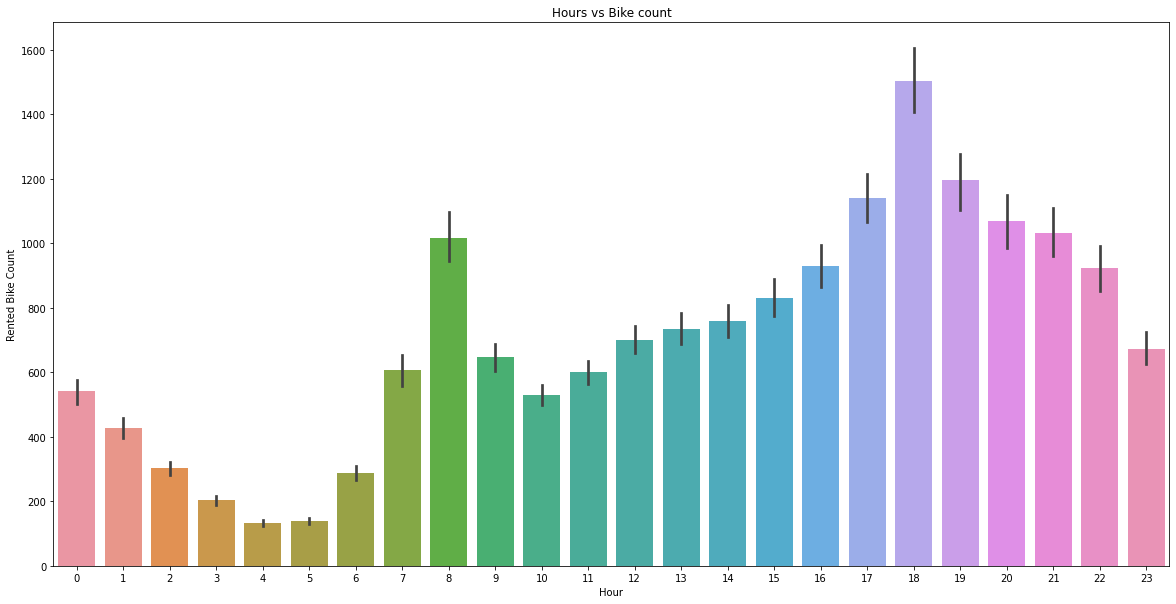

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='Hour',y='Rented Bike Count')
plt.title("Hours vs Bike count")

Text(0.5, 1.0, 'Seasons vs Bike count')

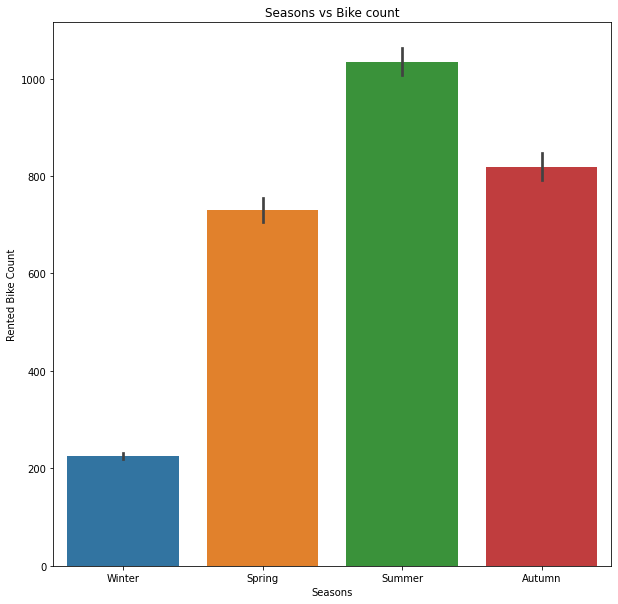

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count')
plt.title("Seasons vs Bike count")

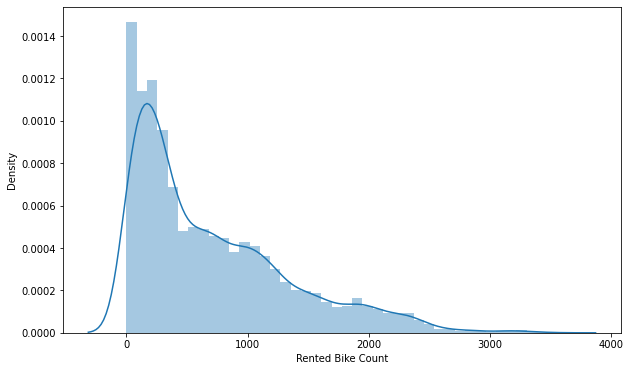

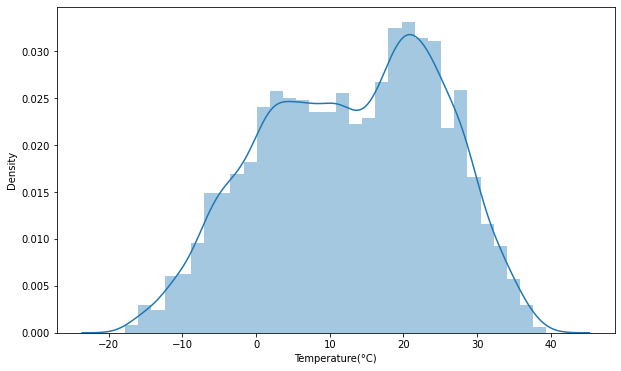

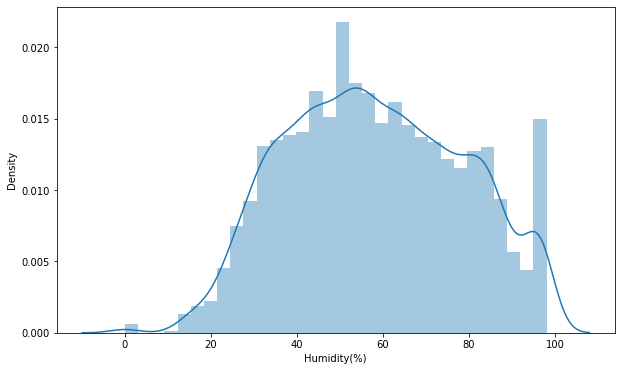

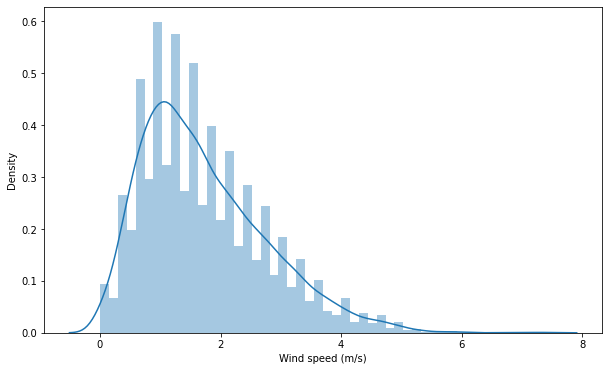

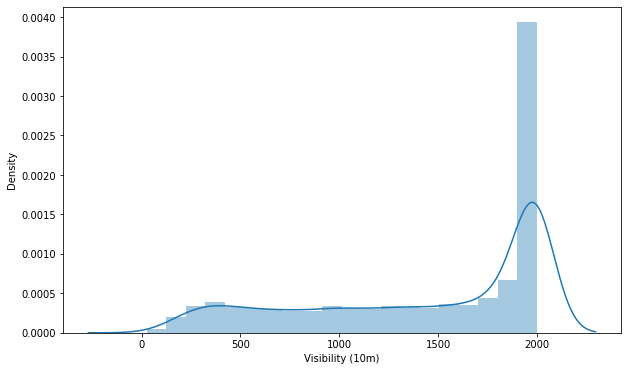

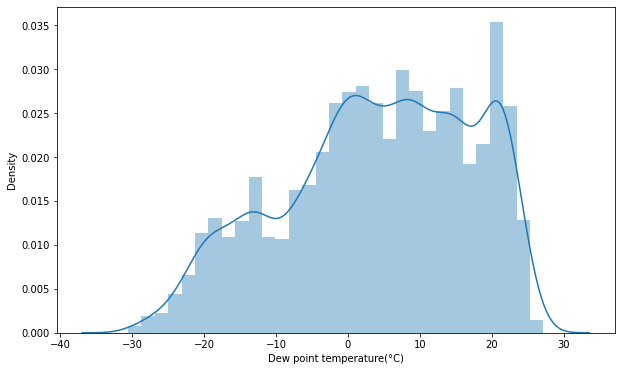

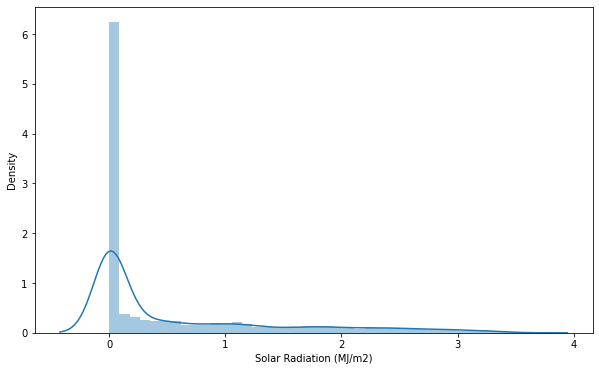

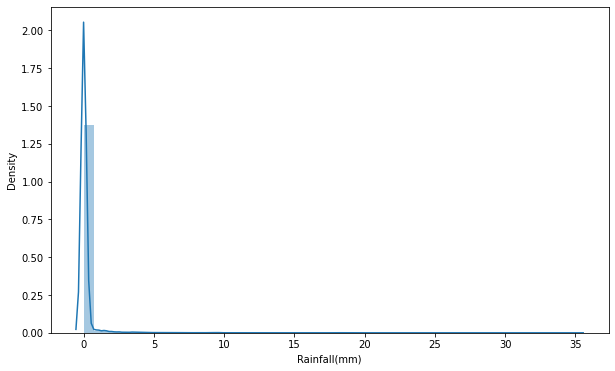

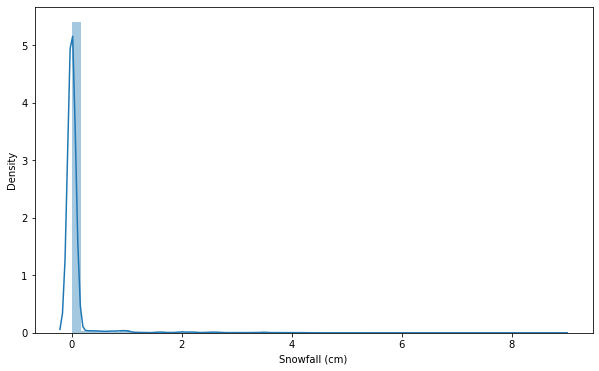

In [ ]:
columns = df.describe().columns
for col in columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

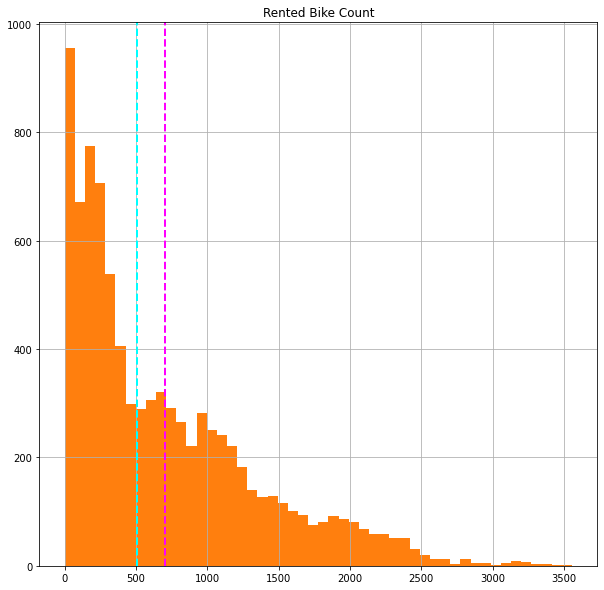

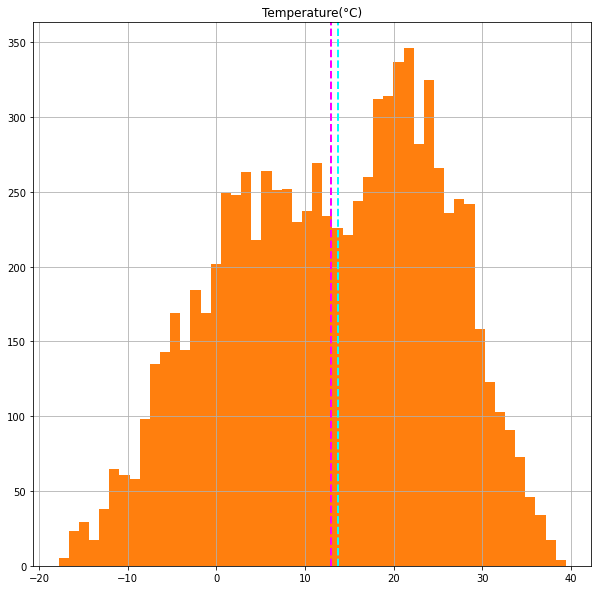

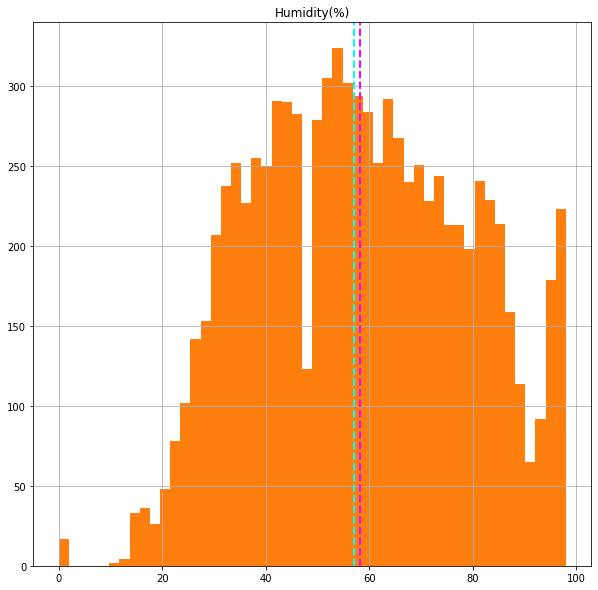

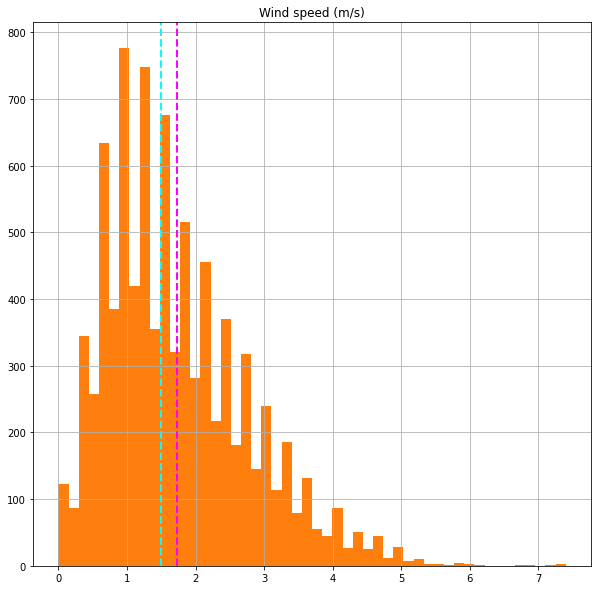

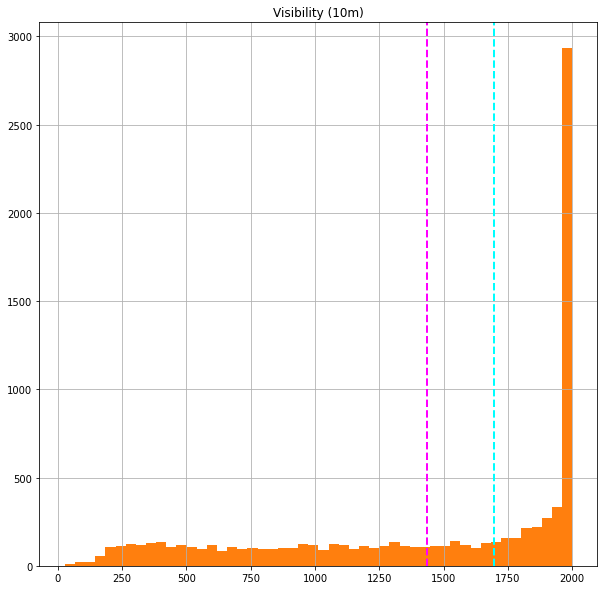

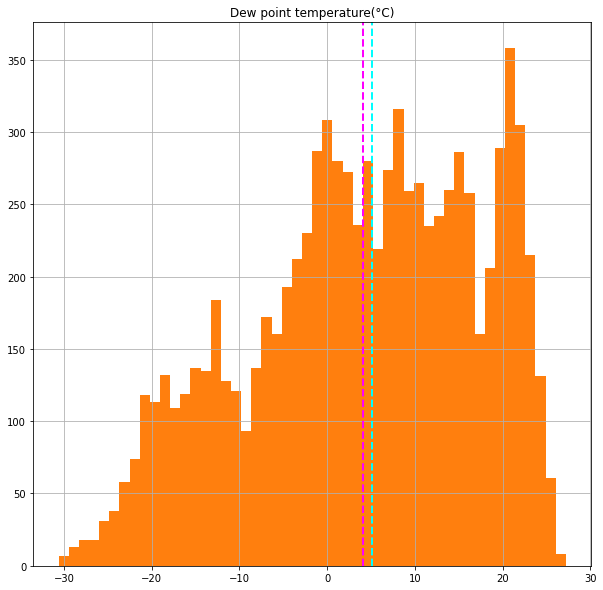

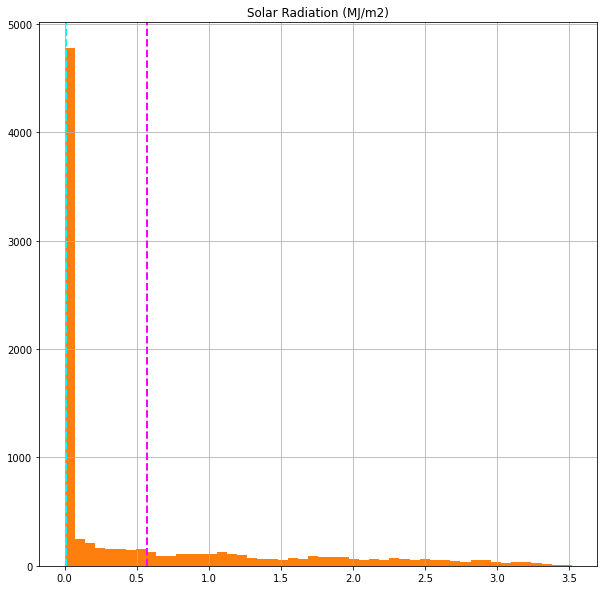

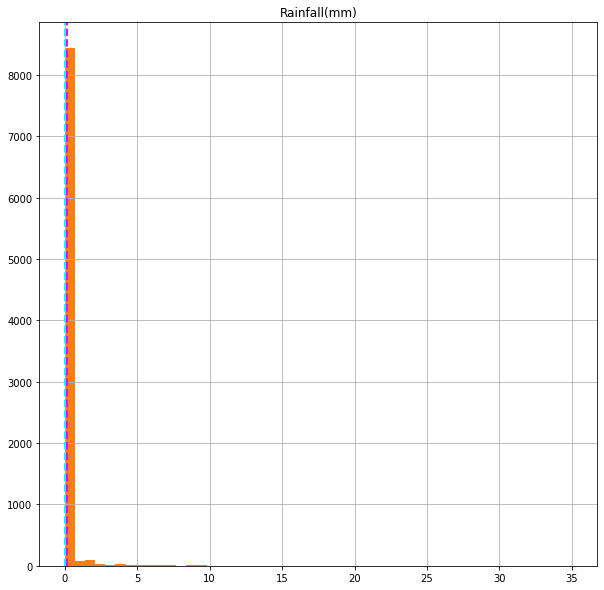

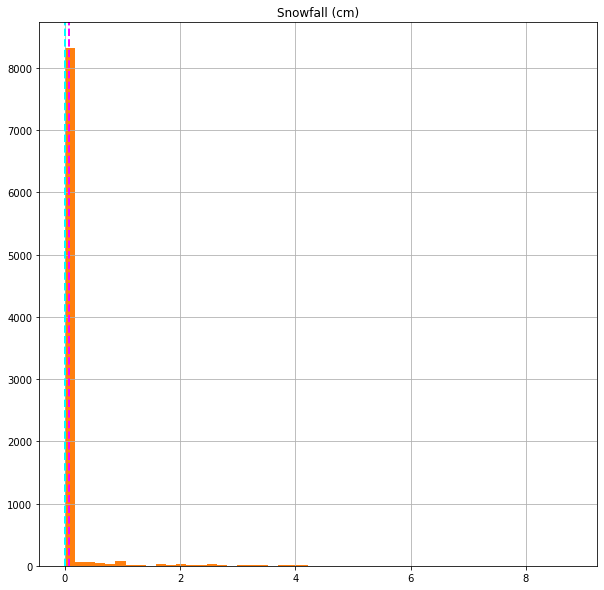

In [ ]:
for i in numeric_features:
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  feature = df[i]
  feature.hist(bins=50, ax = ax)
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(i)
plt.show()

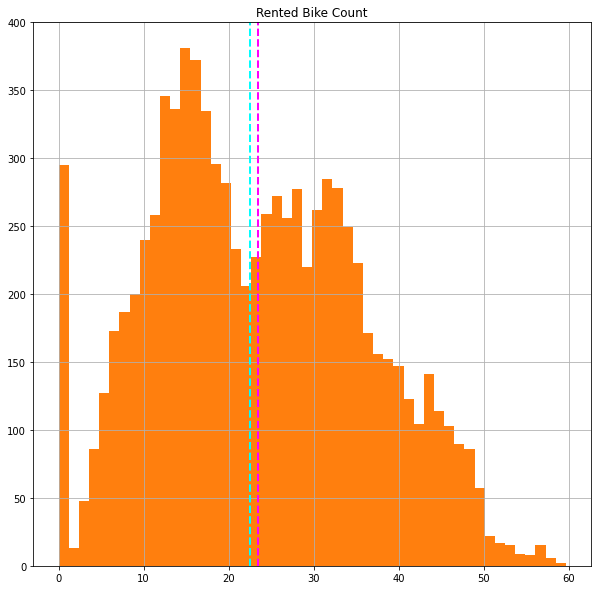

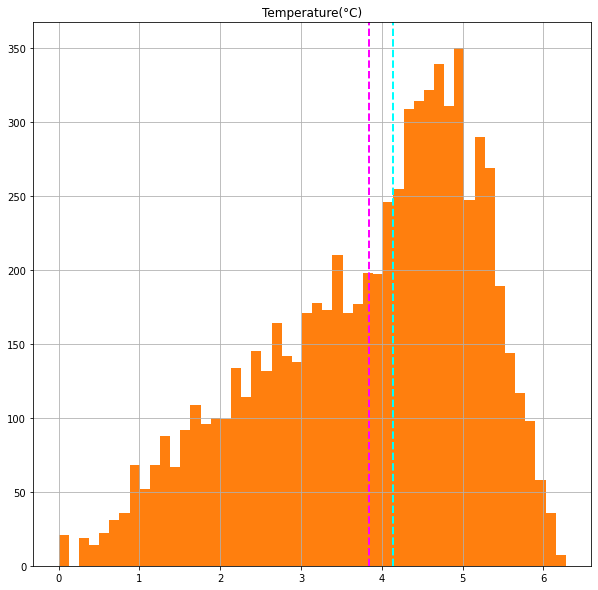

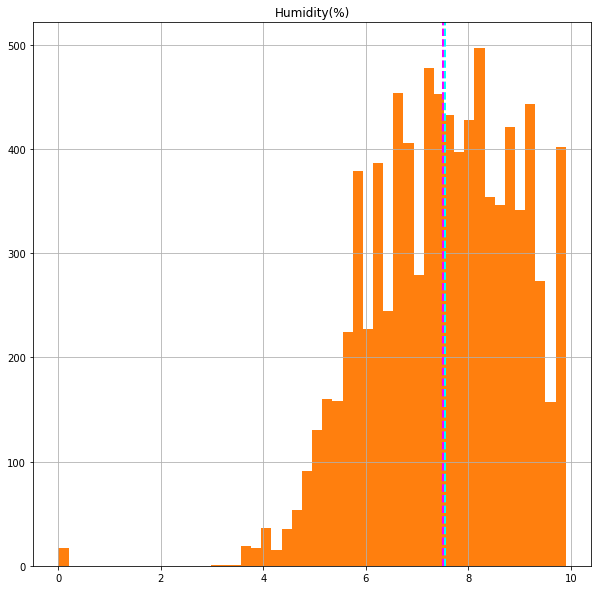

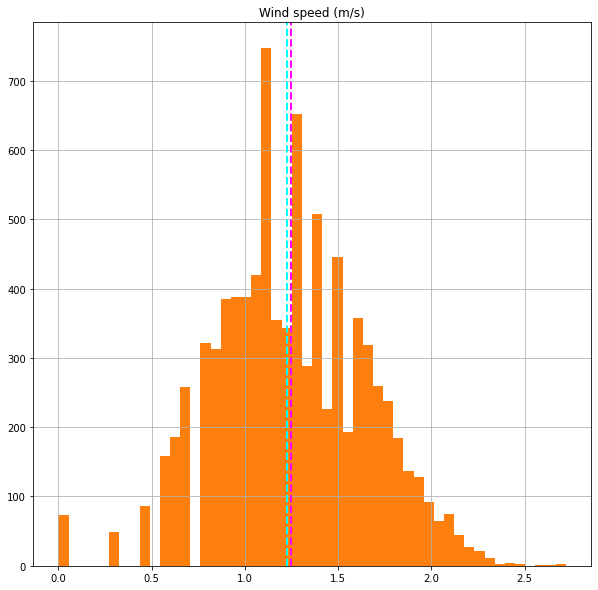

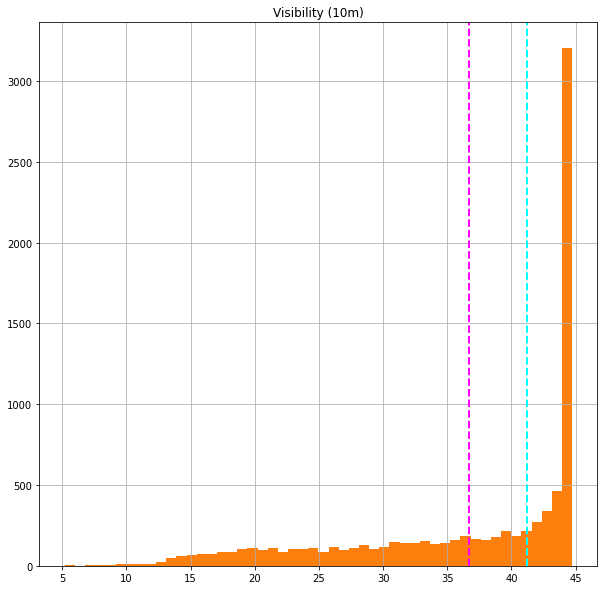

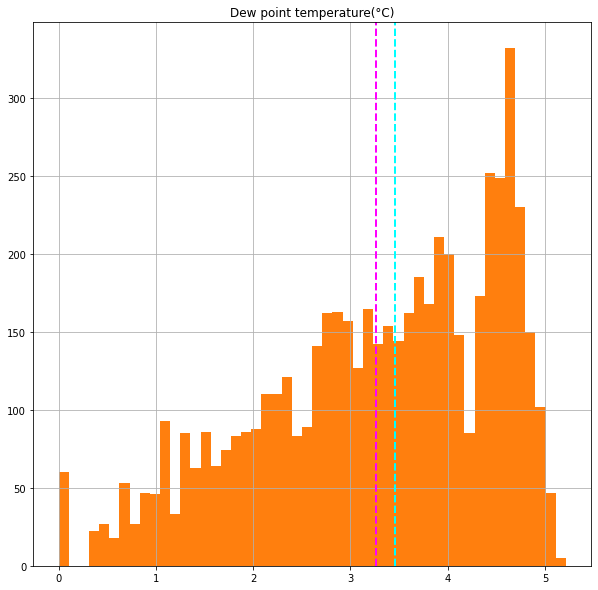

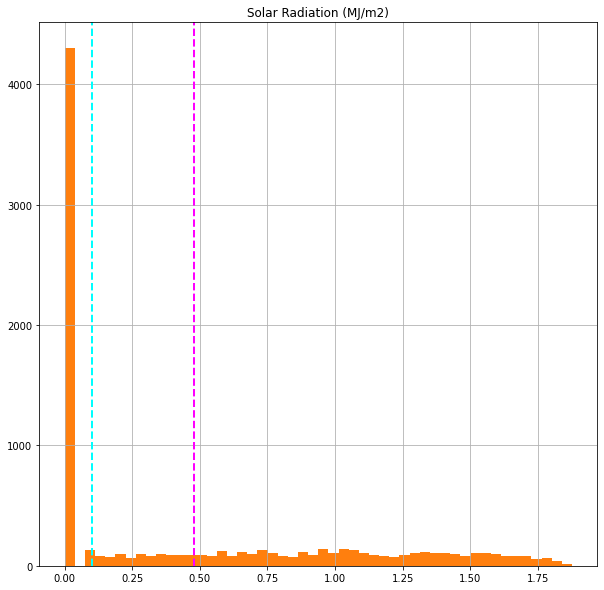

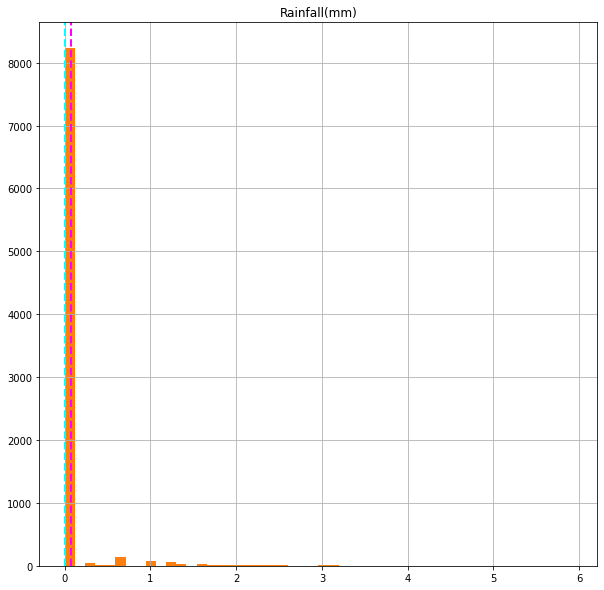

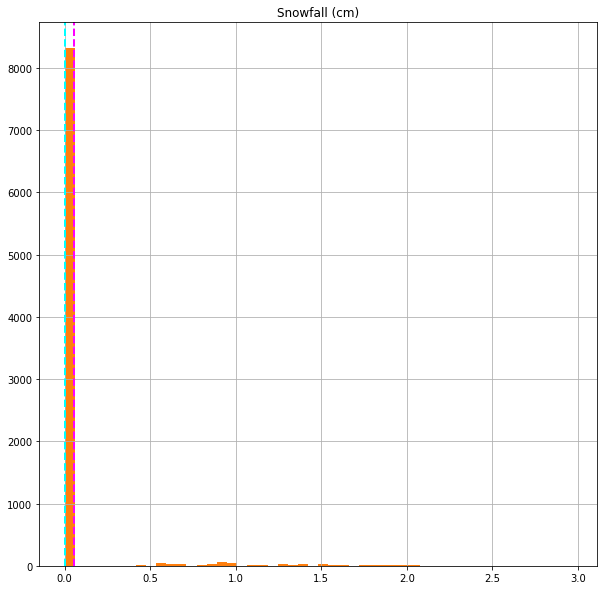

In [ ]:
for i in numeric_features:
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  feature = np.sqrt(df[i])
  feature.hist(bins=50, ax = ax)
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(i)
plt.show()

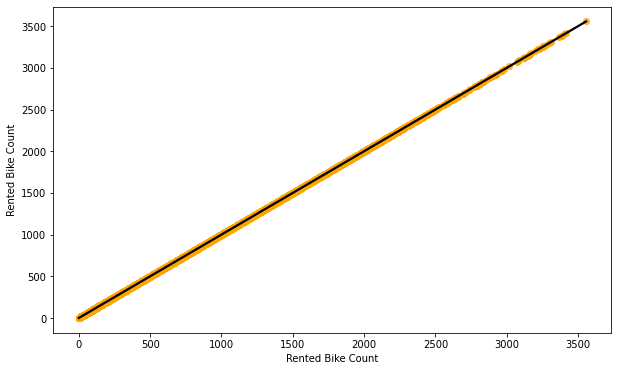

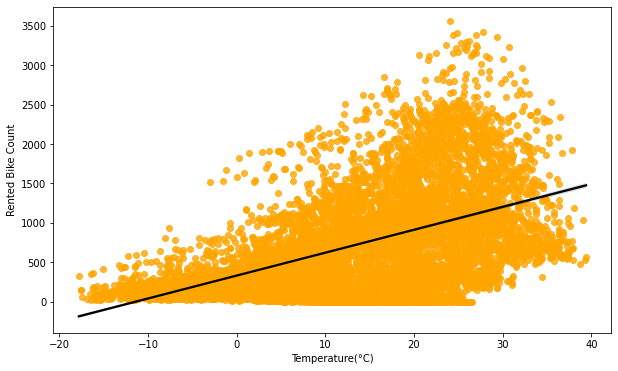

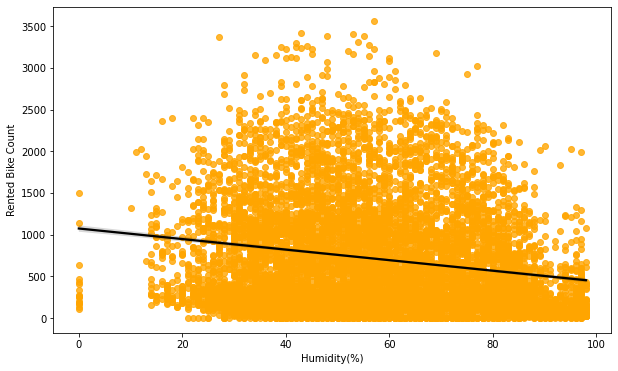

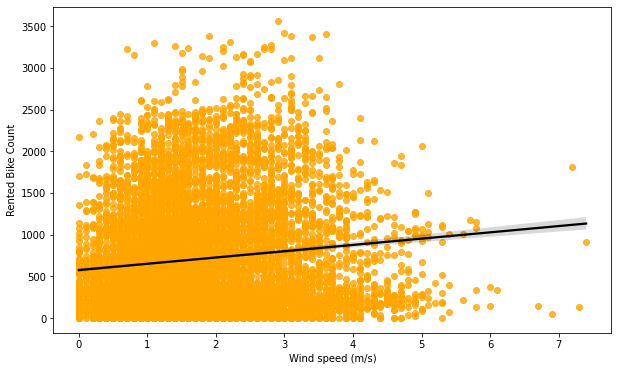

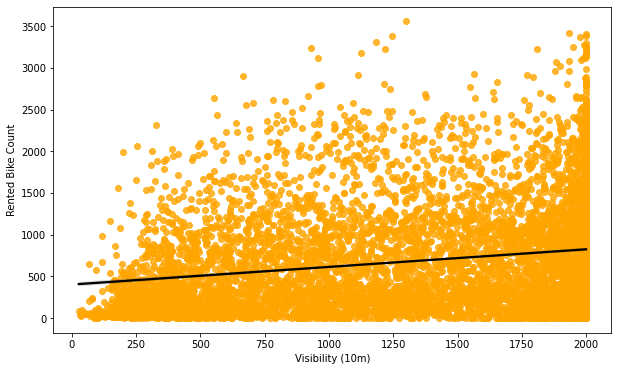

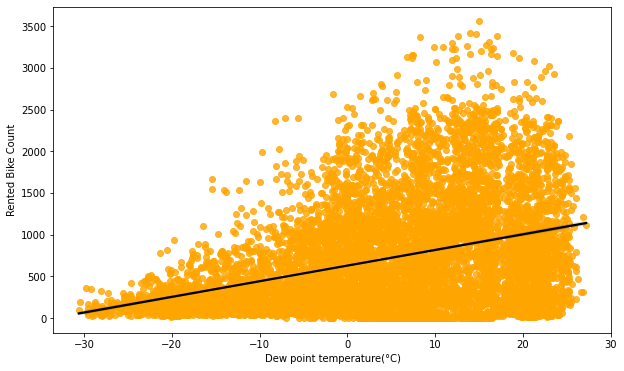

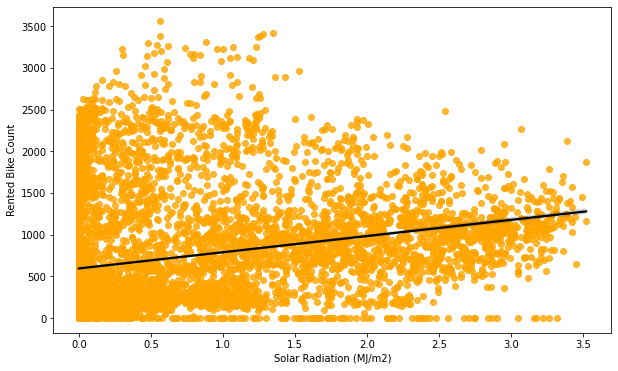

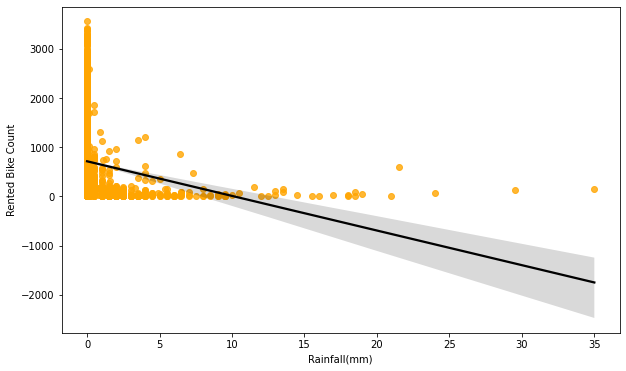

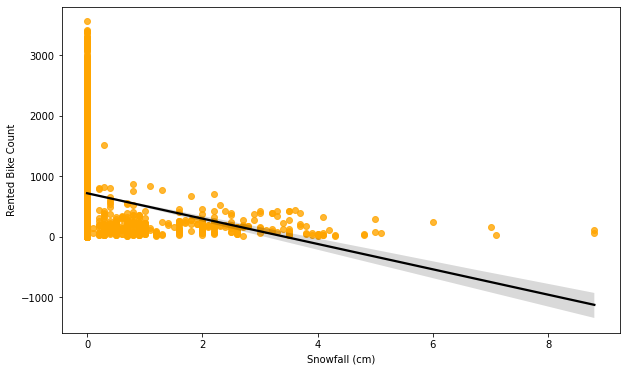

In [ ]:
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

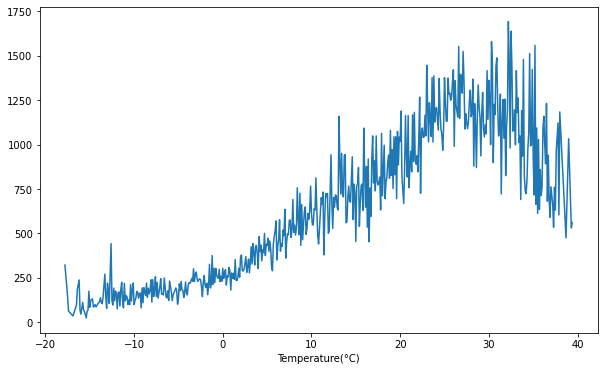

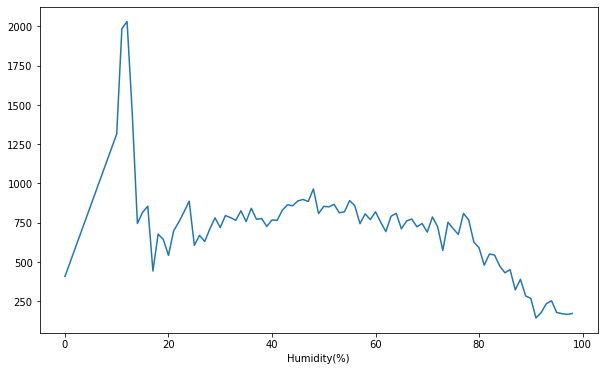

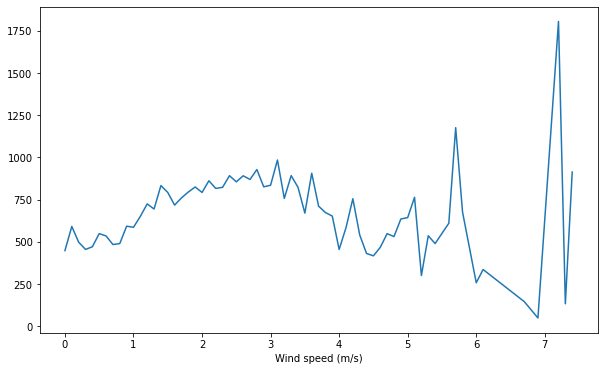

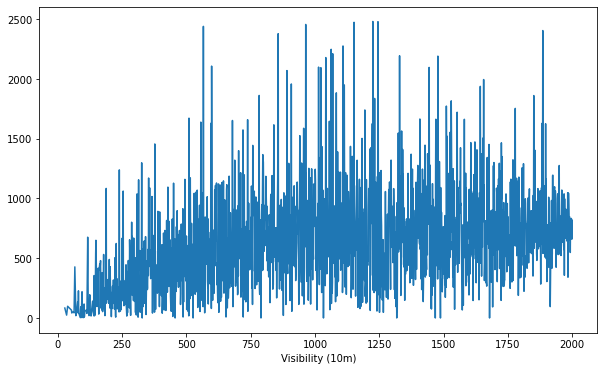

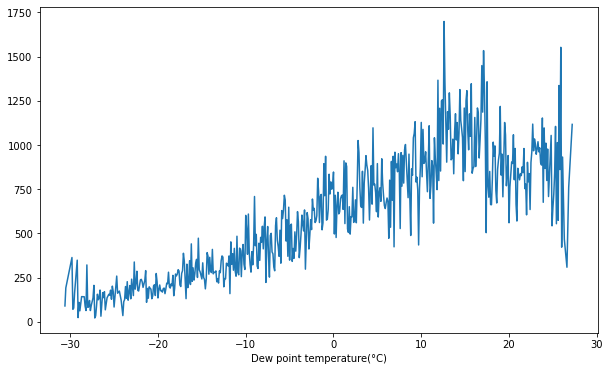

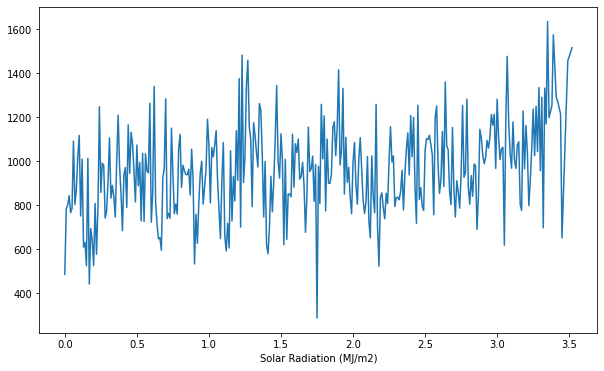

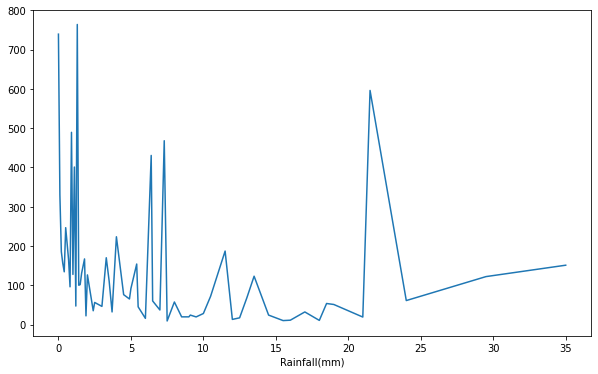

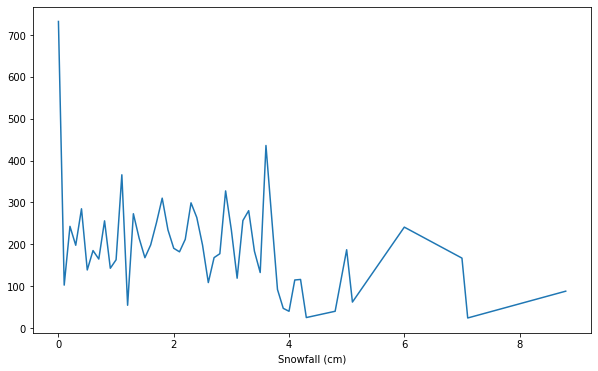

In [ ]:
for col in numeric_features[1:]:
  plt.figure(figsize=(10,6))
  df.groupby(col).mean()['Rented Bike Count'].plot()
  



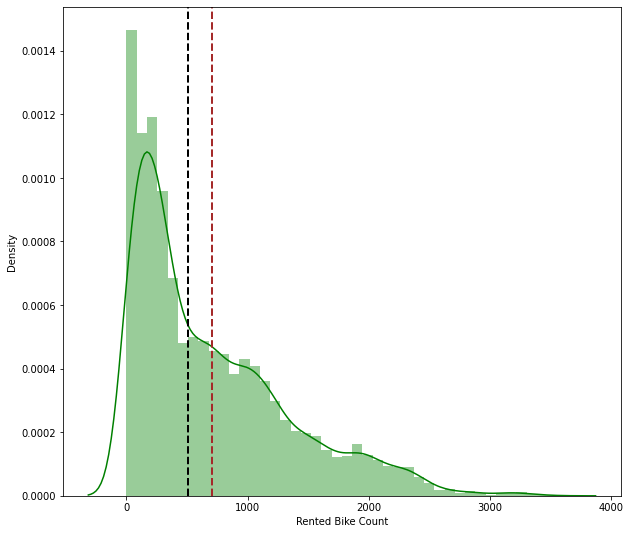

In [ ]:
plt.figure(figsize=(10,9))
ax = sns.distplot(df['Rented Bike Count'], color ='green')
ax.axvline(df['Rented Bike Count'].mean(), color = 'brown', linestyle = 'dashed', linewidth = 2)
ax.axvline(df['Rented Bike Count'].median(), color = 'black', linestyle = 'dashed', linewidth = 2)

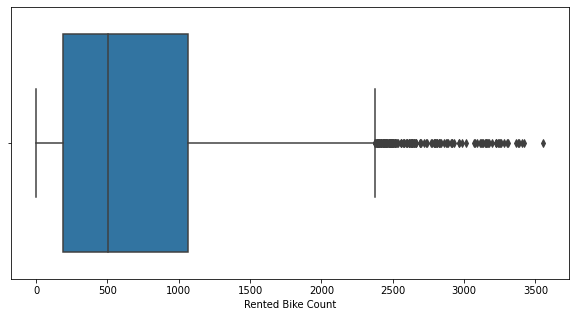

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Rented Bike Count'])

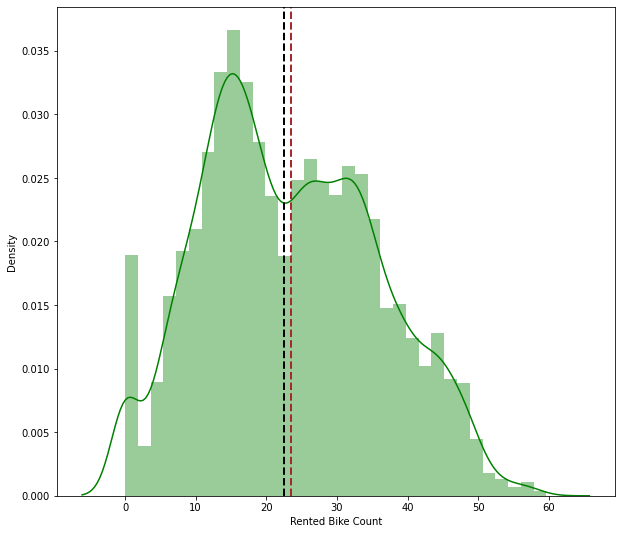

In [ ]:
plt.figure(figsize=(10,9))
ax = sns.distplot(np.sqrt(df['Rented Bike Count']), color ='green')
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color = 'brown', linestyle = 'dashed', linewidth = 2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color = 'black', linestyle = 'dashed', linewidth = 2)
plt.show()

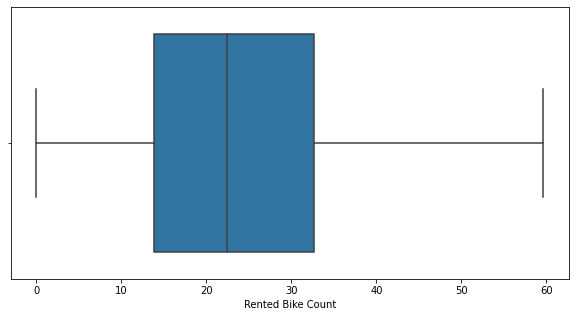

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(np.sqrt(df['Rented Bike Count']))
plt.show()

In [ ]:
df.corr()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


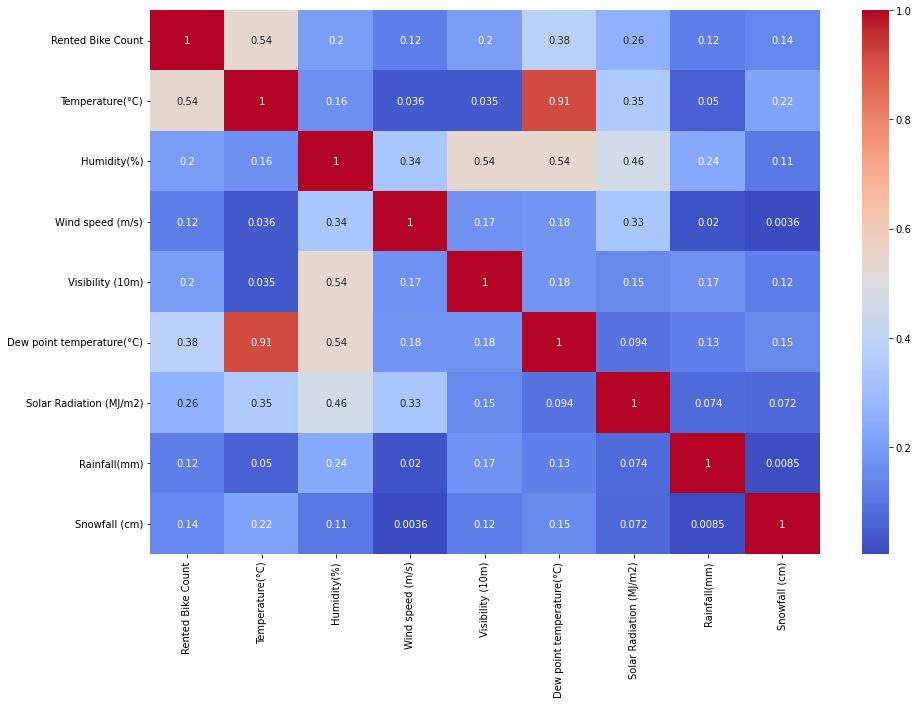

In [ ]:
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'coolwarm')

In [ ]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df_n = pd.DataFrame()
for i in numeric_features[1:]:
  df_n[i] = df[i].values
calc_vif(df_n)


,variables,VIF
0,Temperature(°C),29.075866
1,Humidity(%),5.069743
2,Wind speed (m/s),4.517664
3,Visibility (10m),9.051931
4,Dew point temperature(°C),15.201989
5,Solar Radiation (MJ/m2),2.821604
6,Rainfall(mm),1.079919
7,Snowfall (cm),1.118903


In [ ]:
df = df.drop(['Dew point temperature(°C)'], axis =1)



In [ ]:
df_n = df_n.drop(['Dew point temperature(°C)'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  day                      8760 non-null   object  
 13  month                    8760 non-null   category
 14  Weekend_

In [ ]:
#renwed VIF 
calc_vif(df_n)
#df_n

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


##encoding

In [ ]:
df_copy = df.copy()

In [ ]:
cat_features = df.select_dtypes(['object','category']).columns
cat_features = list(cat_features)
cat_features 

['Hour',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'day',
 'month',
 'Weekend_or_weekday']

In [ ]:
df_copy = pd.get_dummies(df_copy, columns = cat_features)

'''
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in cat_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()
'''   

'\ndef one_hot_encoding(data, column):\n    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)\n    data = data.drop([column], axis=1)\n    return data\n\nfor col in cat_features:\n    df_copy = one_hot_encoding(df_copy, col)\ndf_copy.head()\n'

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Hour_0                   8760 non-null   uint8  
 9   Hour_1                   8760 non-null   uint8  
 10  Hour_2                   8760 non-null   uint8  
 11  Hour_3                   8760 non-null   uint8  
 12  Hour_4                   8760 non-null   uint8  
 13  Hour_5                   8760 non-null   uint8  
 14  Hour_6                  

In [ ]:
df_copy.shape

(8760, 61)

##Model Training



In [ ]:
X = df_copy.drop(columns = ["Rented Bike Count"], axis = 1)
y = df_copy["Rented Bike Count"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature(°C)          8760 non-null   float64
 1   Humidity(%)              8760 non-null   int64  
 2   Wind speed (m/s)         8760 non-null   float64
 3   Visibility (10m)         8760 non-null   int64  
 4   Solar Radiation (MJ/m2)  8760 non-null   float64
 5   Rainfall(mm)             8760 non-null   float64
 6   Snowfall (cm)            8760 non-null   float64
 7   Hour_0                   8760 non-null   uint8  
 8   Hour_1                   8760 non-null   uint8  
 9   Hour_2                   8760 non-null   uint8  
 10  Hour_3                   8760 non-null   uint8  
 11  Hour_4                   8760 non-null   uint8  
 12  Hour_5                   8760 non-null   uint8  
 13  Hour_6                   8760 non-null   uint8  
 14  Hour_7                  

In [ ]:
y.head()


0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [ ]:
"""
from scipy.stats import zscore
features = X.columns
X = df_copy[features].apply(zscore)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
"""
 

'\nfrom scipy.stats import zscore\nfeatures = X.columns\nX = df_copy[features].apply(zscore)\n\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX = scaler.fit_transform(X)\n'

In [ ]:
X.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_0,Hour_1,Hour_2,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Weekend_or_weekday_0,Weekend_or_weekday_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(7008, 60)
(1752, 60)


##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train,y_train)

0.700746001039352

In [ ]:
reg.coef_

array([ 2.64008106e+01, -5.60074180e+00,  5.11278460e+00,  6.40260942e-02,
        5.39336352e+01, -5.94340167e+01,  1.96510574e+01,  1.45961131e+10,
        1.45961130e+10,  1.45961129e+10,  1.45961128e+10,  1.45961128e+10,
        1.45961128e+10,  1.45961130e+10,  1.45961133e+10,  1.45961136e+10,
        1.45961132e+10,  1.45961129e+10,  1.45961129e+10,  1.45961130e+10,
        1.45961130e+10,  1.45961130e+10,  1.45961130e+10,  1.45961132e+10,
        1.45961134e+10,  1.45961139e+10,  1.45961136e+10,  1.45961135e+10,
        1.45961135e+10,  1.45961134e+10,  1.45961132e+10, -1.83776009e+11,
       -2.84306350e+11, -3.88799422e+11, -3.46333374e+11, -2.08837456e+08,
       -2.08837309e+08,  2.67512109e+10,  2.67512118e+10,  1.94926377e+10,
        1.94926377e+10, -2.47684987e+10, -2.47684988e+10,  1.94926377e+10,
        1.94926377e+10,  1.94926377e+10, -4.76249819e+10, -4.76249819e+10,
       -1.09652007e+11, -1.09652006e+11, -1.09652006e+11, -5.15893428e+09,
       -5.15893465e+09, -

In [ ]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 124263.13446768915
RMSE : 352.50976506713846
MAE : 267.92220275913746
R2 : 0.700746001039352
Adjusted R2 : 0.690127881620287


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_test, y_pred_test)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 125416.45964200587
RMSE : 354.1418637241379
MAE : 268.5720883025426
R2 : 0.7003352671950616
Adjusted R2 : 0.6897025741327929


##Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7003361759146651 0.7007457291827308


In [ ]:
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 124263.24735425369
RMSE : 352.509925185453
MAE : 267.9109840325039
R2 : 0.7007457291827308
Adjusted R2 : 0.6901276001176592


In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 125416.07932232515
RMSE : 354.1413267642244
MAE : 268.55949648486757
R2 : 0.7003361759146651
Adjusted R2 : 0.6897035150955522


In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -126444.72503233708


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 0.01}  the negative mean squared error is:  -126812.91213122917


In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [ ]:
ridge.score(X_train,y_train)

0.7007421111622703

In [ ]:
ridge.score(X_test,y_test)

0.7003377734602289

##Elasticnet

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train,y_train)

0.6205835787814794

In [ ]:
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 157550.0208280469
RMSE : 396.92571197649426
MAE : 293.7656587057157
R2 : 0.6205835787814794
Adjusted R2 : 0.6071211392349913


In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 161834.19190648102
RMSE : 402.2862064581397
MAE : 298.10095495182435
R2 : 0.6133202929281544
Adjusted R2 : 0.5996001377393249


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf_model.score(X_train,y_train)

0.9886928399226061

In [ ]:
rf_model.score(X_test,y_test)

0.916643229082145

In [ ]:

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9886928399226061
MSE : 4695.219305422374
RMSE : 68.5216703344451
MAE : 40.15051369863014
R2 : 0.9886928399226061
Adjusted R2 : 0.9882916396833137


In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 34886.69152973744
RMSE : 186.77979422233403
MAE : 109.51623858447489
R2 : 0.916643229082145
Adjusted R2 : 0.9136855671926883


In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

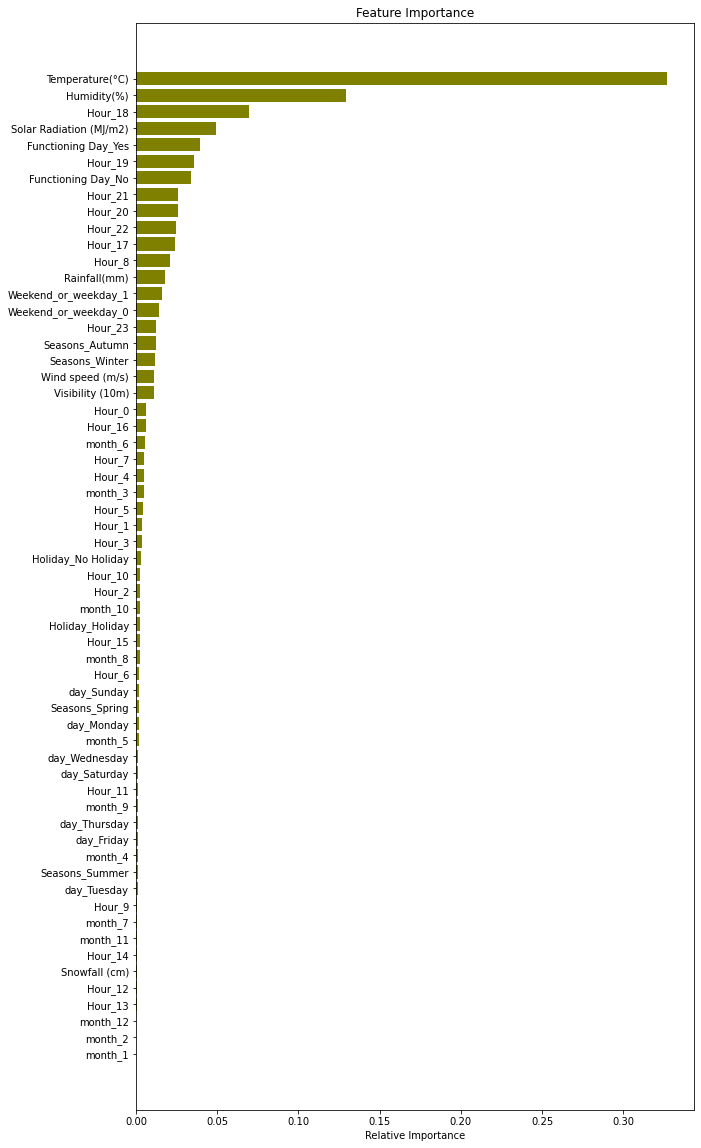

In [ ]:
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='olive', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8478817046971258
MSE : 63166.06043651373
RMSE : 251.32859056723677
MAE : 180.82933495534832
R2 : 0.8478817046971258
Adjusted R2 : 0.8424842489205602


In [ ]:
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 70345.11281448338
RMSE : 265.22653112854937
MAE : 190.88868100814594
R2 : 0.8319203915031812
Adjusted R2 : 0.8259565969970848


In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

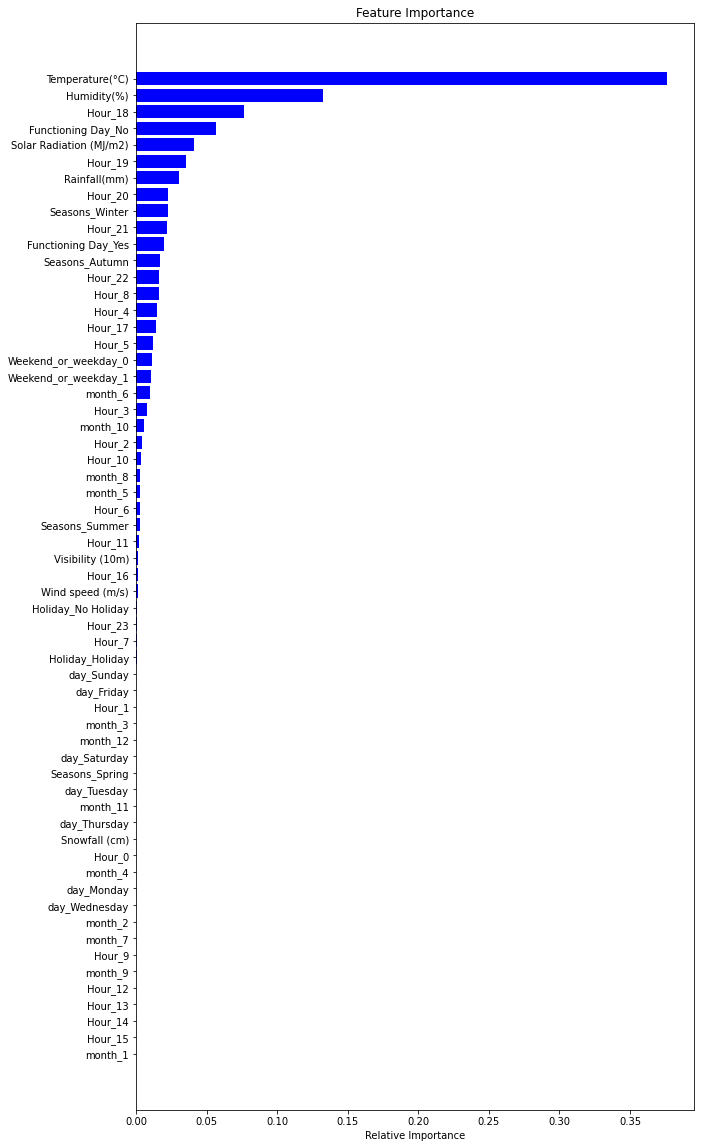

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()